In [67]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import os


In [68]:
df = pd.read_csv('../input/spotify-recommendation/data.csv')
df.shape


(195, 14)

In [69]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [71]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [72]:
df['liked'].value_counts()

1    100
0     95
Name: liked, dtype: int64

In [73]:
df.corr().style.background_gradient(cmap='Greens')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


## Correlation between all features and target column - 'Liked'
Just based off this correlation matrix, we can tell that this spotify user has a preference for songs:
1. scoring high on - danceability, loudness, speechiness
2. scoring low on - instrumentalness, duration


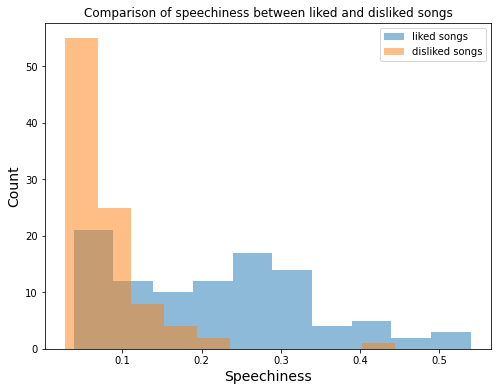

In [74]:
liked = df['liked'] == 1
disliked = df['liked'] == 0
liked_songs = df[liked]
disliked_songs = df[disliked]

plt.figure(figsize=(8,6))
plt.hist(liked_songs['speechiness'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['speechiness'], alpha=0.5, label="disliked songs")

plt.xlabel("Speechiness", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of speechiness between liked and disliked songs")
plt.legend(loc='upper right')

Here, we can see that almost all of the user's disliked songs score very low on Speechiness.

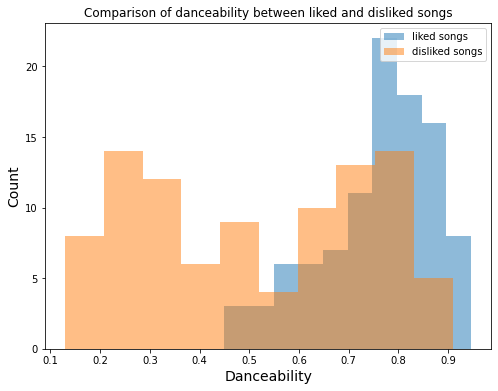

In [75]:
plt.figure(figsize=(8,6))
plt.hist(liked_songs['danceability'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['danceability'], alpha=0.5, label="disliked songs")

plt.xlabel("Danceability", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of danceability between liked and disliked songs")
plt.legend(loc='upper right')

And here, we can see that many of the user's liked songs score very high on Danceability.

From the two charts above, we can see that even if a song scores high on Danceability, it still wouldn't guarantee the user's like. We can also see that even if a song scores low on speechiness, it doesn't guarantee the user's dislike.

#### I wonder if we combine these two features, we might get a starker difference

<AxesSubplot:title={'center':'Distribution of likes among songs with high speechiness and danceability'}>

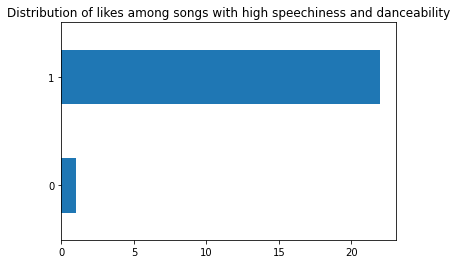

In [76]:
high_speechiness = df['speechiness'] > 0.3 
high_danceability = df['danceability'] > 0.6

songs_with_high_dance_and_speech = df[high_speechiness & high_danceability]
plt.title("Distribution of likes among songs with high speechiness and danceability")
songs_with_high_dance_and_speech['liked'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:title={'center':'Distribution of likes among songs with low speechiness and danceability'}>

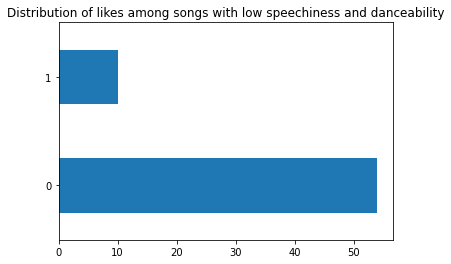

In [77]:
songs_with_low_dance_and_speech = df[~high_speechiness & ~high_danceability]
plt.title("Distribution of likes among songs with low speechiness and danceability")
songs_with_low_dance_and_speech['liked'].value_counts().plot(kind = 'barh')

It looks like if a song scores highly on both speechiness and danceability, it's very likely to get the user's like. And the opposite is true: if a song scores low on both speechiness and danceability, it would also be more likely to be disliked.

Another interesting thing I noted in the correlation matrix was how danceability have a very strong inverse relationship to instrumentalness (which makes sense). And I'm curious how this relationship would look

Text(0, 0.5, 'Instrumentalness')

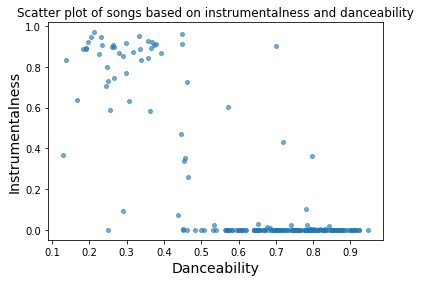

In [78]:

plt.plot(df['danceability'], df['instrumentalness'], 'o', markersize = 4, alpha=0.6)
plt.title("Scatter plot of songs based on instrumentalness and danceability")
plt.xlabel("Danceability", size=14)
plt.ylabel("Instrumentalness", size=14)

Text(0, 0.5, 'Instrumentalness')

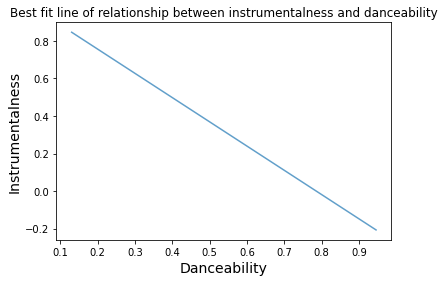

In [79]:
from scipy.stats import linregress

xs = df['danceability']
ys = df['instrumentalness']

# Compute the linear regression
res = linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title("Best fit line of relationship between instrumentalness and danceability")
plt.xlabel("Danceability", size=14)
plt.ylabel("Instrumentalness", size=14)

In [80]:
c = df.corr()
c['liked'].sort_values(kind="quicksort")

instrumentalness   -0.569440
duration_ms        -0.490651
acousticness       -0.179375
key                -0.044406
liveness           -0.009797
mode                0.023747
energy              0.176179
time_signature      0.221479
valence             0.268653
tempo               0.371202
loudness            0.410774
danceability        0.569425
speechiness         0.591505
liked               1.000000
Name: liked, dtype: float64

Again, just to reiterate, it seems like author likes speechiness, danceability, non-instrumental, short songs. And that makes sense since he mentioned he likes mostly French rap.

## Prediction
And out of curiosity, I would like to see how good these spotify song features are at predicting this user's likes and dislikes. I will attempt to use the Random Forest Classifier to test it out.

A Random Forest Classifier builds multiple decision trees and merges them together to get a more accurate and stable prediction

In [81]:
from sklearn.model_selection import train_test_split

x, y = df.drop('liked',axis=1),df['liked']
x.shape, y.shape

((195, 13), (195,))

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape
x_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42,0.603,0.886,5,-3.777,0,0.0837,0.000450,0.000000,0.2600,0.395,126.025,229933,4
17,0.745,0.456,8,-9.482,1,0.0874,0.440000,0.000000,0.0720,0.124,94.032,314367,4
5,0.778,0.632,8,-6.415,1,0.1250,0.040400,0.000000,0.0912,0.827,140.951,224029,4
120,0.671,0.584,9,-9.959,0,0.5400,0.650000,0.000000,0.1280,0.366,119.303,209440,5
98,0.764,0.812,7,-4.946,1,0.1790,0.202000,0.000000,0.1260,0.742,139.961,194973,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.816,0.667,7,-8.561,1,0.0758,0.235000,0.000000,0.0599,0.402,134.985,85333,3
137,0.456,0.456,11,-16.055,0,0.0535,0.973000,0.353000,0.1860,0.974,144.489,210680,3
72,0.750,0.772,10,-8.706,0,0.1570,0.206000,0.000000,0.0748,0.561,139.980,224496,4
140,0.699,0.610,9,-6.900,1,0.2310,0.001530,0.000002,0.3690,0.577,170.103,204000,4


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score = metrics.accuracy_score(y_test, predictions)
accuracy_score

0.9830508474576272

In [84]:
import xgboost as xgb

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(x_test)

# Calculate accuracy
xgb_accuracy = metrics.accuracy_score(y_test, xgb_predictions)
xgb_accuracy


[04:01:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9661016949152542

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_model.fit(x_train, y_train)

# Making predictions
knn_predictions = knn_model.predict(x_test)

# Calculating accuracy
knn_accuracy_score = metrics.accuracy_score(y_test, knn_predictions)
knn_accuracy_score


0.7627118644067796

In [86]:
from sklearn.ensemble import VotingClassifier

# Create the sub-models
model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model2 = KNeighborsClassifier(n_neighbors=3)

# Create the voting classifier
ensemble = VotingClassifier(estimators=[('rf', model1), ('knn', model2)], voting='hard')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Make predictions
ensemble_predictions = ensemble.predict(x_test)

# Calculate accuracy
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_predictions)
ensemble_accuracy


0.8983050847457628

F1 Score: 0.896551724137931


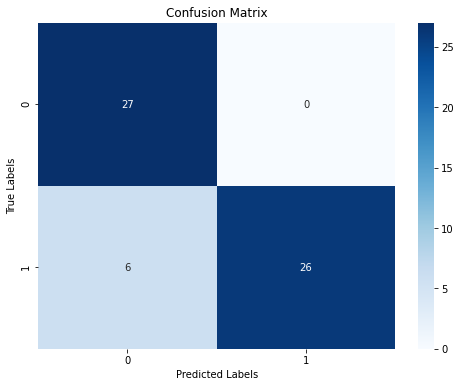

In [87]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating F1 score for the ensemble model
ensemble_f1 = f1_score(y_test, ensemble_predictions)

# Creating a confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Displaying the F1 score
print("F1 Score:", ensemble_f1)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### As we can tell from the extremely high accuracy score, spotify song features are impressively useful!

In [88]:
from sklearn.metrics import roc_auc_score

# Assuming that your model is a binary classifier
# For ROC-AUC, you need the probabilities of the positive class, not just the predictions
# Make sure your model has a method to predict probabilities
# For example, using predict_proba with XGBoost
xgb_probabilities = xgb_model.predict_proba(x_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, xgb_probabilities)

# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9976851851851852


In [90]:
# Predict on training and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate accuracy or F1-score for both sets
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
test_accuracy = metrics.accuracy_score(y_test, test_predictions)


train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Training F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Training Accuracy: 0.9779411764705882
Test Accuracy: 0.9830508474576272
Training F1 Score: 0.9781021897810219
Test F1 Score: 0.9846153846153847
